In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.impute import SimpleImputer 
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('D:\Loan_Default.csv')

In [5]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
df.shape

(148670, 34)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [11]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [13]:
df = df.drop(['rate_of_interest','Interest_rate_spread', 'Upfront_charges' ], axis=1)

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,148660,148661,148662,148663,148664,148665,148666,148667,148668,148669
ID,24890,24891,24892,24893,24894,24895,24896,24897,24898,24899,...,173550,173551,173552,173553,173554,173555,173556,173557,173558,173559
year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
loan_limit,cf,cf,cf,cf,cf,cf,cf,NaN,cf,cf,...,cf,cf,cf,cf,cf,cf,cf,cf,cf,cf
Gender,Sex Not Available,Male,Male,Male,Joint,Joint,Joint,Female,Joint,Sex Not Available,...,Female,Sex Not Available,Joint,Male,Joint,Sex Not Available,Male,Male,Female,Female
approv_in_adv,nopre,nopre,pre,nopre,pre,pre,pre,nopre,nopre,nopre,...,nopre,nopre,nopre,nopre,nopre,nopre,nopre,nopre,nopre,nopre
loan_type,type1,type2,type1,type1,type1,type1,type1,type1,type1,type3,...,type1,type2,type1,type2,type2,type1,type1,type1,type1,type1
loan_purpose,p1,p1,p1,p4,p1,p1,p3,p4,p3,p3,...,p4,p4,p4,p1,p1,p3,p1,p4,p4,p3
Credit_Worthiness,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,...,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1
open_credit,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,...,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc,nopc
business_or_commercial,nob/c,b/c,nob/c,nob/c,nob/c,nob/c,nob/c,nob/c,nob/c,nob/c,...,nob/c,b/c,nob/c,b/c,b/c,nob/c,nob/c,nob/c,nob/c,nob/c


In [17]:
df.select_dtypes(include=['object']).columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [20]:
obj_col = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type']

In [22]:
for i in obj_col:
    vc = df[i].value_counts()
    print(vc)
    print ('*'*50)
    print(' '*50)

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
**************************************************
                                                  
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
**************************************************
                                                  
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64
**************************************************
                                                  
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
**************************************************
                                                  
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
**************************************************
                                                  
Credit_Worthiness
l1    142344
l2      63

In [24]:
df = df.drop(['construction_type', 'Security_Type', 'Secured_by','total_units', 'lump_sum_payment', 'open_credit', 'Credit_Worthiness', 'interest_only'], axis=1)

In [26]:
df.select_dtypes(include=['object']).columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'Neg_ammortization', 'occupancy_type',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region'],
      dtype='object')

# Encoding

In [31]:
le = LabelEncoder()

In [33]:
col = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'Neg_ammortization', 'occupancy_type',
       'credit_type', 'co-applicant_credit_type',
       'submission_of_application', 'Region']

In [35]:
for i in col:
    df[i] = le.fit_transform(df[i])
    

In [36]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,148660,148661,148662,148663,148664,148665,148666,148667,148668,148669
ID,24890,24891,24892,24893,24894,24895,24896,24897,24898,24899,...,173550,173551,173552,173553,173554,173555,173556,173557,173558,173559
year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
loan_limit,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Gender,3,2,2,2,1,1,1,0,1,3,...,0,3,1,2,1,3,2,2,0,0
approv_in_adv,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loan_type,0,1,0,0,0,0,0,0,0,2,...,0,1,0,1,1,0,0,0,0,0
loan_purpose,0,0,0,3,0,0,2,3,2,2,...,3,3,3,0,0,2,0,3,3,2
business_or_commercial,1,0,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1,1,1,1,1
loan_amount,116500,206500,406500,456500,696500,706500,346500,266500,376500,436500,...,366500,346500,646500,106500,156500,436500,586500,446500,196500,406500
term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,360.0,360.0,360.0,360.0,180.0,360.0,180.0,180.0,240.0


In [39]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
business_or_commercial           0
loan_amount                      0
term                            41
Neg_ammortization                0
property_value               15098
occupancy_type                   0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application        0
LTV                          15098
Region                           0
Status                           0
dtir1                        24121
dtype: int64

# Null Value Imputation

In [43]:
si = SimpleImputer()

In [45]:
im_col = ['property_value', 'income', 'LTV']

In [47]:
for i in im_col:
    df[i] = si.fit_transform(df[[i]])

In [49]:
si = SimpleImputer(strategy='most_frequent')

df['term'] = si.fit_transform(df[['term']])

In [51]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
business_or_commercial           0
loan_amount                      0
term                             0
Neg_ammortization                0
property_value                   0
occupancy_type                   0
income                           0
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application        0
LTV                              0
Region                           0
Status                           0
dtir1                        24121
dtype: int64

In [53]:
print(df['dtir1'].skew())

-0.5514649624329434


<Axes: xlabel='dtir1', ylabel='Density'>

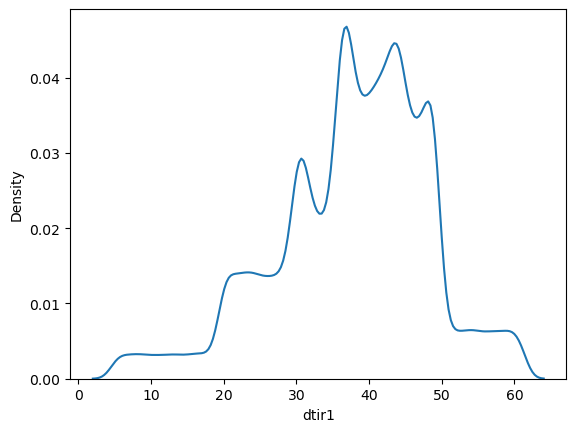

In [55]:
sns.kdeplot(df['dtir1'])

In [57]:
i_d = df.groupby('income')['dtir1']

In [59]:
i_d.value_counts()

income    dtir1
0.0       5.0      32
          17.0     32
          7.0      26
          16.0     25
          12.0     24
                   ..
335880.0  6.0       1
          20.0      1
374400.0  11.0      1
377220.0  5.0       1
578580.0  7.0       1
Name: count, Length: 16212, dtype: int64

In [61]:
df['dtir1'] = df.groupby('income')['dtir1'].transform(lambda x: x.fillna(x.median()))

In [63]:
df['age'].value_counts()

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

In [65]:
mode_value = df['age'].mode()[0]

In [67]:
mode_value

'45-54'

In [69]:
df['age'].fillna(mode_value, inplace=True)

In [71]:
df.isnull().sum()

ID                            0
year                          0
loan_limit                    0
Gender                        0
approv_in_adv                 0
loan_type                     0
loan_purpose                  0
business_or_commercial        0
loan_amount                   0
term                          0
Neg_ammortization             0
property_value                0
occupancy_type                0
income                        0
credit_type                   0
Credit_Score                  0
co-applicant_credit_type      0
age                           0
submission_of_application     0
LTV                           0
Region                        0
Status                        0
dtir1                        48
dtype: int64

In [73]:
df = df.dropna(subset=['dtir1'])

In [75]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,148660,148661,148662,148663,148664,148665,148666,148667,148668,148669
ID,24890,24891,24892,24893,24894,24895,24896,24897,24898,24899,...,173550,173551,173552,173553,173554,173555,173556,173557,173558,173559
year,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
loan_limit,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Gender,3,2,2,2,1,1,1,0,1,3,...,0,3,1,2,1,3,2,2,0,0
approv_in_adv,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loan_type,0,1,0,0,0,0,0,0,0,2,...,0,1,0,1,1,0,0,0,0,0
loan_purpose,0,0,0,3,0,0,2,3,2,2,...,3,3,3,0,0,2,0,3,3,2
business_or_commercial,1,0,1,1,1,1,1,1,1,1,...,1,0,1,0,0,1,1,1,1,1
loan_amount,116500,206500,406500,456500,696500,706500,346500,266500,376500,436500,...,366500,346500,646500,106500,156500,436500,586500,446500,196500,406500
term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,360.0,360.0,360.0,360.0,180.0,360.0,180.0,180.0,240.0


In [77]:
df['age'].value_counts()

age
45-54    34903
35-44    32808
55-64    32524
65-74    20738
25-34    19140
>74       7173
<25       1336
Name: count, dtype: int64

* Age column value replace

In [83]:
df['age'] = df['age'].replace({'45-54': 49.5, '35-44': 39.5, '55-64': 59.5, '65-74': 69.5, '25-34': 29.5, '>74': 75, '<25': 25})

In [85]:
df['age'].value_counts()

age
49.5    34903
39.5    32808
59.5    32524
69.5    20738
29.5    19140
75.0     7173
25.0     1336
Name: count, dtype: int64

In [89]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,business_or_commercial,loan_amount,term,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1
0,24890,2019,0,3,0,0,0,1,116500,360.0,...,1740.0,3,758,0,29.5,1,98.728814,3,1,45.0
1,24891,2019,0,2,0,1,0,0,206500,360.0,...,4980.0,2,552,1,59.5,1,72.746457,0,1,40.0
2,24892,2019,0,2,1,0,0,1,406500,360.0,...,9480.0,3,834,0,39.5,1,80.019685,3,0,46.0
3,24893,2019,0,2,0,0,3,1,456500,360.0,...,11880.0,3,587,0,49.5,0,69.376900,0,0,42.0
4,24894,2019,0,1,1,0,0,1,696500,360.0,...,10440.0,1,602,1,29.5,0,91.886544,0,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,0,3,0,0,2,1,436500,180.0,...,7860.0,0,659,1,59.5,1,71.792763,3,0,48.0
148666,173556,2019,0,2,0,0,0,1,586500,360.0,...,7140.0,0,569,0,29.5,0,74.428934,3,0,15.0
148667,173557,2019,0,2,0,0,3,1,446500,180.0,...,6900.0,0,702,1,49.5,0,61.332418,0,0,49.0
148668,173558,2019,0,0,0,0,3,1,196500,180.0,...,7140.0,3,737,1,59.5,1,70.683453,0,0,29.0


# Handling Imbalance Data : SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

smt =SMOTE(sampling_strategy=0.7, random_state=42)

X = df.drop('Status', axis=1)
y = df['Status']

In [11]:
Xs, ys = smt.fit_resample(X,y)

In [13]:
Xs.shape

(190452, 22)

In [15]:
ys.shape

(190452,)

In [17]:
ys.value_counts()

Status
0    112031
1     78421
Name: count, dtype: int64

# Correlation

In [65]:
df.corr()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,business_or_commercial,loan_amount,term,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1
ID,1.000000,NaN,-0.000218,0.003363,0.000577,0.000321,-0.000419,-0.001089,-0.000659,-0.004163,...,0.001899,0.000473,-0.001068,0.006025,0.004112,-0.000514,-0.005546,0.002047,0.001645,-0.007576
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_limit,-0.000218,NaN,1.000000,0.004046,0.018238,0.025326,-0.047275,0.006814,0.171406,0.017278,...,0.086377,0.000041,0.002592,0.020664,-0.008975,-0.001755,0.013499,0.001592,0.039144,-0.000256
Gender,0.003363,NaN,0.004046,1.000000,0.008822,0.064213,0.037961,0.005222,-0.065939,-0.052265,...,-0.004719,0.021097,0.004437,-0.055858,0.014814,0.262548,0.006882,0.470783,0.051706,-0.019758
approv_in_adv,0.000577,NaN,0.018238,0.008822,1.000000,-0.005113,-0.137255,-0.008729,-0.031489,0.020650,...,-0.013085,-0.005783,-0.000615,-0.011027,-0.023538,0.077945,0.028120,-0.007677,-0.033308,0.017584
loan_type,0.000321,NaN,0.025326,0.064213,-0.005113,1.000000,0.019597,-0.410637,-0.071923,0.126840,...,-0.124486,0.065190,-0.004342,0.031390,0.061055,0.097187,0.162422,-0.001181,0.052623,0.067161
loan_purpose,-0.000419,NaN,-0.047275,0.037961,-0.137255,0.019597,1.000000,0.055231,0.067279,-0.123399,...,0.008820,0.021083,0.000961,-0.004409,0.130788,0.002219,-0.103750,0.070912,-0.027567,-0.111924
business_or_commercial,-0.001089,NaN,0.006814,0.005222,-0.008729,-0.410637,0.055231,1.000000,0.162598,-0.093332,...,0.131132,-0.023237,0.000784,0.023123,0.074269,-0.096226,-0.130222,0.004152,-0.092826,-0.111721
loan_amount,-0.000659,NaN,0.171406,-0.065939,-0.031489,-0.071923,0.067279,0.162598,1.000000,0.174868,...,0.444097,-0.015112,0.004501,0.147177,-0.185793,-0.430030,0.036517,0.006393,-0.038611,-0.019041
term,-0.004163,NaN,0.017278,-0.052265,0.020650,0.126840,-0.123399,-0.093332,0.174868,1.000000,...,-0.054050,0.010480,-0.003192,-0.005912,-0.088999,-0.153611,0.101228,-0.037905,-0.000158,0.086042


In [69]:
dc = df.drop('year', axis=1)

<Axes: >

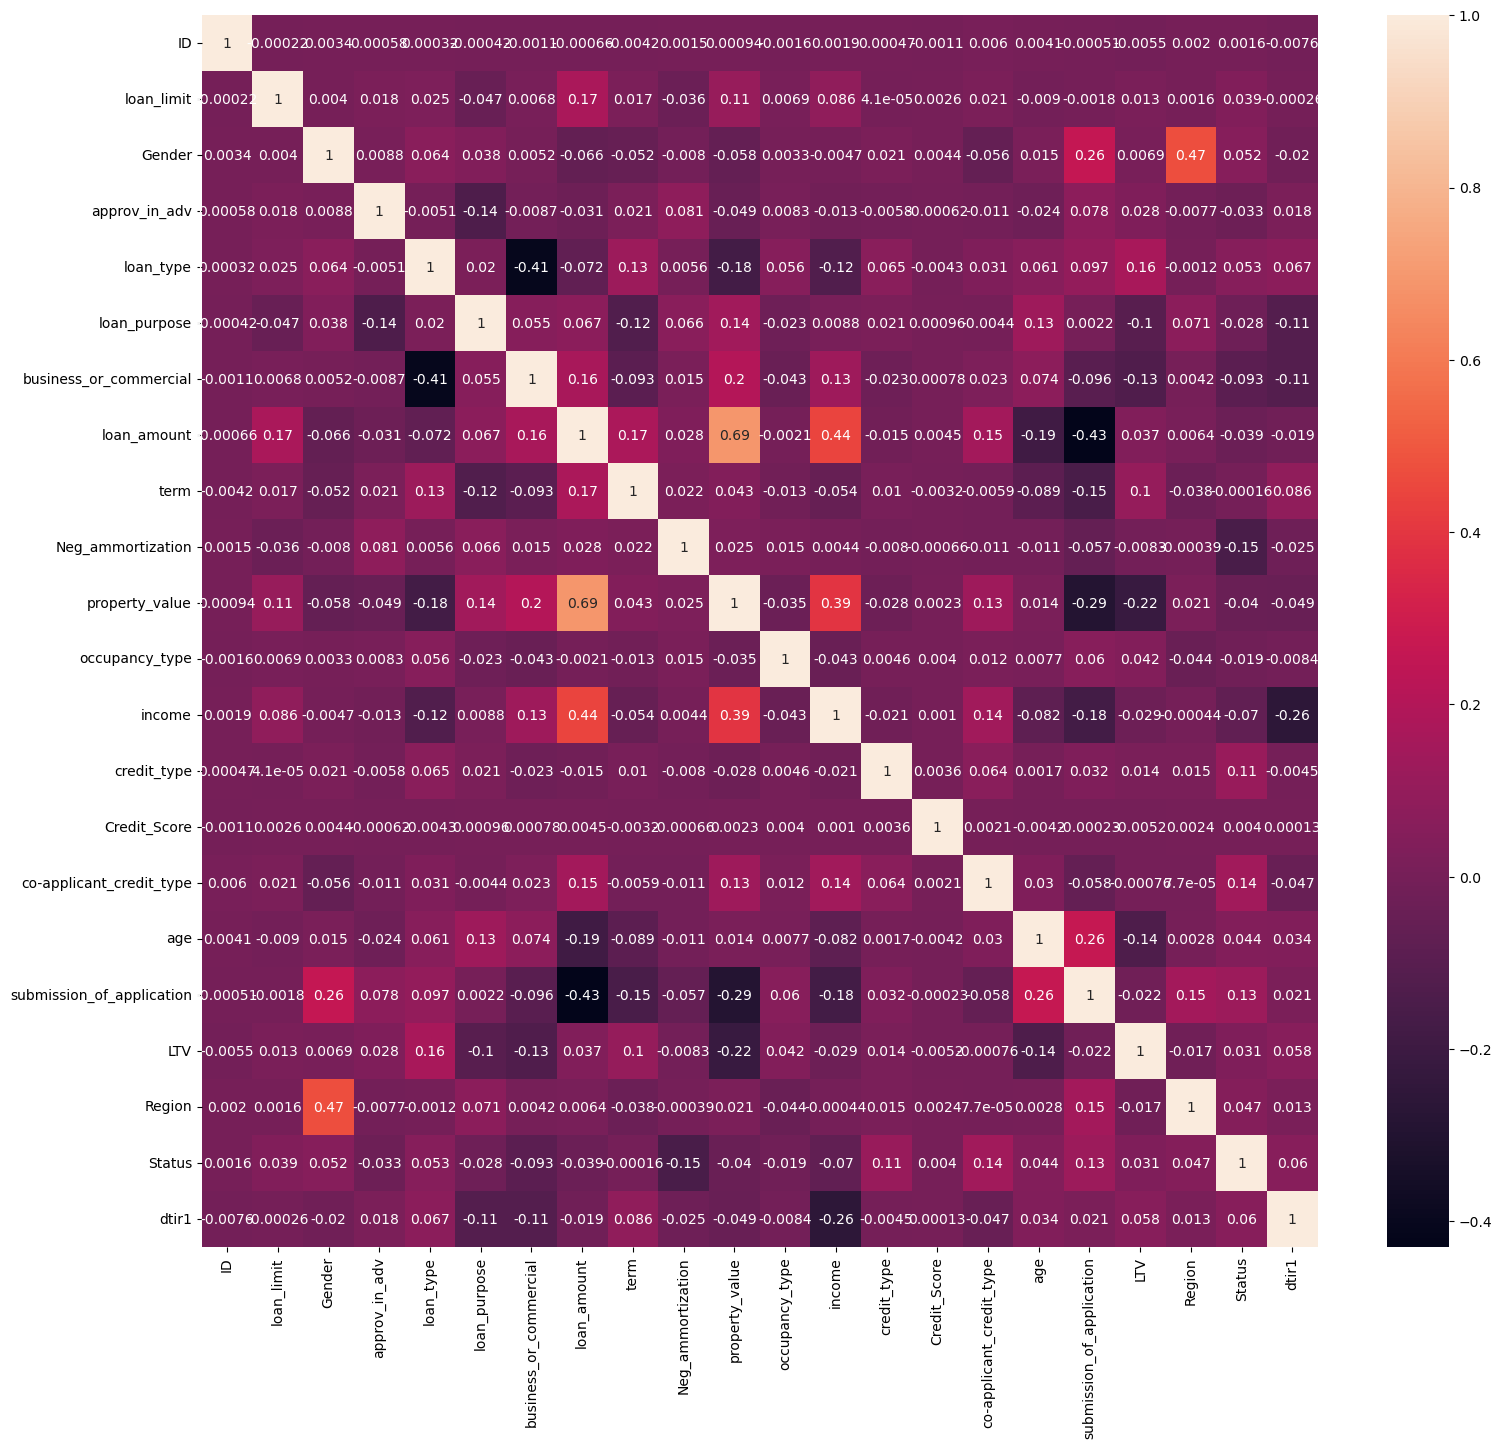

In [71]:
plt.figure(figsize=(18,16))
sns.heatmap(dc.corr(), annot=True)

# Model Selection

In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, test_size=0.2, random_state=42)

In [21]:
models = {
    'rf' : RandomForestClassifier(random_state=42),
    'gb' : GradientBoostingClassifier(random_state=42),
    'xg' : XGBClassifier(random_state=42),
}

In [27]:
result = []
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_pred, y_test)
    f1 = f1_score (y_pred, y_test)
    rc = recall_score(y_pred, y_test)
    ps = precision_score(y_pred, y_test)

    result.append({
        'Model' : name,
        'Acc_s' : acc,
        'f1' : f1,
        'rs' : rc,
        'ps' : ps
    })

In [29]:
result

[{'Model': 'rf',
  'Acc_s': 0.9020503531017826,
  'f1': 0.8692940970397618,
  'rs': 0.9543846153846154,
  'ps': 0.7981344483756835},
 {'Model': 'gb',
  'Acc_s': 0.890105274211756,
  'f1': 0.8491748937090149,
  'rs': 0.9651896142190187,
  'ps': 0.7580572531360567},
 {'Model': 'xg',
  'Acc_s': 0.9132340972933238,
  'f1': 0.8846220980973992,
  'rs': 0.9671755725190839,
  'ps': 0.8150530717272435}]

# Hyper Parameter tuning

In [32]:
prm = {
    'n_estimators' : [50,100,150],
    'max_depth' : [2,3,4,5],
    'learning_rate' : [0.02, 0.05, 0.1, 0.2],
    'subsample' : [0.7,0.8,1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
     'reg_alpha': [0, 0.01, 0.1, 1, 10],   
    'reg_lambda': [1, 2, 5, 10]
}

In [34]:
xgb = XGBClassifier(random_state=42)

In [44]:
rsc = RandomizedSearchCV(
    estimator= xgb,
    param_distributions=prm,
    cv= 5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    n_iter=50
)

In [46]:
rsc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.02, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'reg_alpha': [0, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [1, 2, 5, 10],
                                        'subsample': [0.7, 0.8, 1]},
                   random_state=42, scoring='accuracy')

In [48]:
rsc.best_score_

0.9090187182819317

In [50]:
rsc.best_params_

{'subsample': 0.8,
 'reg_lambda': 10,
 'reg_alpha': 0.1,
 'n_estimators': 150,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.1}

# Building Model on Best Parameter

In [53]:
xgb = XGBClassifier( subsample=0.8, reg_lambda=10, reg_alpha=0.1,
                   n_estimators=150, max_depth=5, learning_rate=0.2, gamma=0.1)

In [55]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred = xgb.predict(X_test)

acc = accuracy_score(y_pred, y_test)
f1 = f1_score (y_pred, y_test)
rc = recall_score(y_pred, y_test)
ps = precision_score(y_pred, y_test)

In [78]:
roc = roc_auc_score(y_pred, y_test)

In [ ]:
recall_score, precision_score

In [80]:
print ('Accuracy: ', acc)
print ('f1: ',f1 )
print ('recall: ',rc)
print ('precision: ', ps)
print ('roc_auc: ', roc)

Accuracy:  0.9104512877057572
f1:  0.8805379469757993
recall:  0.9664052890528906
precision:  0.8086844644580251
roc_auc:  0.9239194646835236
